# MACHINE LEARNING
- Author: SUNIL K S

# Data Preprocessing
- Missing value treatment
- Outlier removal
- Column type conversion
- Standardisation
# Split data in to train and test
- Build models using train data
- Test/validate model using test data
# Decision Trees
- Gini impurity
- Parent Node, Child node level
- Draw your decision tree rules
- Model fitting using training data, prediction for test data
- Performance Metrics : Acuracy , Sensitivity , Specificity
     

# Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [4]:
# Here we are importing a file named HR ANALYTICS 
hr = pd.read_csv('HR ANALYTICS.csv')

#### Using this data we are going to predict whether the employee will stay in the firm or the employee will leave the firm

In [5]:
hr.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
hr['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

#### to check how many people have left and have stayed in the firm using Attrition column

In [13]:
# to convert categorical to numeric we use dummies
hr_dummies=pd.get_dummies(hr)

# TREE STRUCTURE

In [35]:
train_y = train['Attrition']
test_y = test['Attrition']
train_x= train[['MonthlyIncome','OverTime_No','Gender_Female']]#
test_x=test[['MonthlyIncome']]
model= DecisionTreeClassifier(random_state=100,max_depth=2)
model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

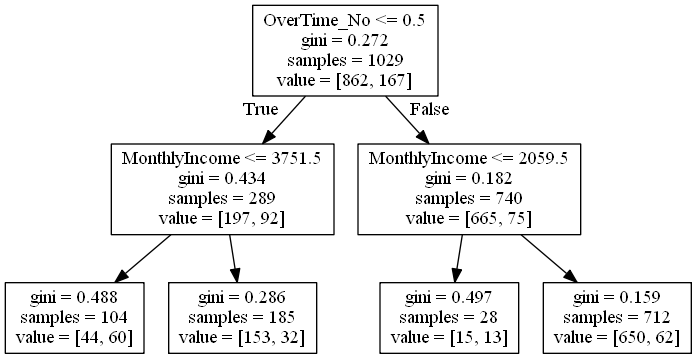

In [37]:
def draw_tree(model, columns):
    import pydotplus # for graphs
    from sklearn.externals.six import StringIO
    from IPython.display import Image# helps to view image and also html pages
    import os
    graphviz_path='C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["path"] += os.pathsep + graphviz_path
    dot_data= StringIO()
    tree.export_graphviz(model,
                    out_file=dot_data,
                    feature_names= train_x.columns)
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())
draw_tree(model, train_x.columns)

## SPLIT DATA

In [31]:
train , test = train_test_split(hr_dummies, test_size=0.3, random_state=100)
train_y = train['Attrition']
test_y= test['Attrition']
train_x= train.drop('Attrition', axis=1) # for row wise operation using col
test_x= test.drop('Attrition',axis=1)


### BUILDING MODEL

In [16]:
model= DecisionTreeClassifier()
model.fit(train_x, train_y)
test_pred= model.predict(test_x)
df_pred= pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred.head()

,actual,predicted
880,0,1
152,0,0
1466,0,0
1084,0,0
1086,0,0


In [19]:
# TRUE POSITIVE
tp3 = df_pred[(df_pred['predicted']==1) &(df_pred['actual']==1)].shape[0]

# TRUE NEGATIVE

tn3 = df_pred[(df_pred['predicted']==0) &(df_pred['actual']==0)].shape[0]

# FALSE POSITIVE

fp3 = df_pred[(df_pred['predicted']==1) &(df_pred['actual']==0)].shape[0]

#FALSE NEGATIVE

fn3 = df_pred[(df_pred['predicted']==0) &(df_pred['actual']==1)].shape[0]


print('TRUE POSITIVE: %d' %tp3)
print('TRUE NEGATIVE: %d' %tn3)
print('FALSE POSITIVE: %d' %fp3)
print('FALSE NEGATIVE: %d' %fn3)

TRUE POSITIVE: 31
TRUE NEGATIVE: 305
FALSE POSITIVE: 66
FALSE NEGATIVE: 39


In [20]:
Accuracy= (tp3+tn3)/(tp3+tn3+fp3+fn3)
Sensitivity=tp3/(tp3+fn3)
Specificity=tn3/(fp3+tn3)


In [21]:
dt=pd.Series({'TP':tp3,'TN':tn3,'FP':fp3, 'FN':fn3, 'Accuracy': Accuracy, 'Sensitivity':Sensitivity, 'Specificity':Specificity})

In [23]:
Decision_Tree=pd.DataFrame({'Decision Tree':dt})
Decision_Tree

,Decision Tree
TP,31.000000
TN,305.000000
FP,66.000000
FN,39.000000
Accuracy,0.761905
Sensitivity,0.442857
Specificity,0.822102
